In [1]:
# importing modules, cleaning tabular data, selecting all columns, and extracting features and target variables from a DataFrame
import pandas as pd
from tabular_data import hello
h = hello()
df = pd.read_csv("/Users/dq/Documents/aicore_project/Airbnb_Project/AirBnbData.csv")
df = h.clean_tabular_data(df)
df = df.iloc[:,:]
x, y = h.load_airbnb(df,"Price_Night")

In [2]:
y

0      105.0
1       92.0
2       52.0
3      132.0
5      143.0
       ...  
982    240.0
983     78.0
984    113.0
985     80.0
987    104.0
Name: Price_Night, Length: 830, dtype: float64

In [3]:
# Splits the data into training and testing sets, initializes a SGD regressor, 
# fits the model to the training data, makes predictions on the test set, and calculates the predicted values for the test set.
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)
model = SGDRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_pred

array([-5.58315067e+09, -4.60381892e+09, -8.37268808e+09, -6.22614852e+09,
       -7.97245172e+09, -8.81841493e+09, -8.09490396e+09, -1.87331501e+09,
       -8.22214556e+09, -6.82511452e+09, -4.76012809e+09, -5.83421014e+09,
       -6.55105581e+09, -6.27655846e+09, -3.38682706e+09, -6.44786585e+09,
       -4.35764092e+09, -6.46270299e+09, -5.28050444e+09, -5.29192264e+09,
       -8.87646060e+09, -8.08843711e+09,  3.99512079e+08, -1.55106214e+09,
       -2.50189581e+09, -5.91243998e+09, -1.43228059e+10, -3.48353944e+09,
       -3.87764556e+09, -3.63477298e+09, -1.31604073e+10, -5.41216572e+09,
       -4.17705818e+09, -5.37904000e+09, -2.96068658e+09, -2.22779523e+09,
       -5.12352504e+08, -4.88210463e+09, -1.92754892e+09, -3.99147616e+09,
       -2.11297722e+09, -5.99957863e+09, -2.79338904e+09,  2.57747901e+08,
       -4.51782568e+09, -5.86017713e+09, -8.05093452e+09, -7.66804848e+09,
       -4.33933943e+09, -4.12952408e+09, -1.25816104e+10, -1.46663827e+09,
       -4.77070486e+08, -

In [4]:
# Creates a pandas DataFrame with two columns: 'Actual' and 'Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
761,81.0,-5.583151e+09
45,222.0,-4.603819e+09
550,225.0,-8.372688e+09
11,106.0,-6.226149e+09
446,170.0,-7.972452e+09
...,...,...
870,132.0,-7.466146e+09
737,91.0,9.024831e+09
788,211.0,-5.291621e+09
418,145.0,-2.807505e+09


In [5]:
X_test

,guests,beds,bathrooms,Cleanliness_rate,Accuracy_rate,Communication_rate,Location_rate,Check-in_rate,Value_rate,amenities_count,bedrooms
761,2.0,1.0,1.0,4.8,5.0,5.0,5.0,5.0,4.8,24.0,1.0
45,6.0,3.0,1.0,4.9,5.0,5.0,5.0,5.0,4.8,28.0,2.0
550,2.0,1.0,1.0,4.6,4.6,4.6,5.0,4.6,4.6,38.0,1.0
11,5.0,4.0,1.0,4.3,4.5,4.4,4.8,4.5,4.1,10.0,1.0
446,4.0,3.0,1.0,4.9,4.9,5.0,4.9,5.0,4.9,56.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
870,6.0,5.0,1.5,5.0,5.0,5.0,5.0,5.0,5.0,61.0,3.0
737,6.0,3.0,2.0,5.0,5.0,5.0,4.3,4.3,5.0,14.0,2.0
788,4.0,2.0,1.0,5.0,5.0,5.0,5.0,5.0,4.9,36.0,2.0
418,2.0,1.0,1.5,5.0,5.0,5.0,4.9,5.0,4.9,25.0,1.0


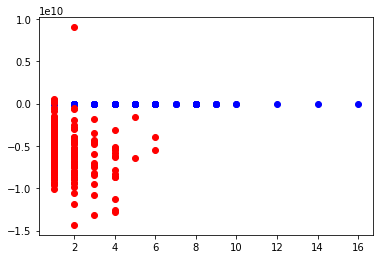

In [6]:
# Plotting 'guests' on the x-axis and 'Price_Night' on the y-axis
import numpy as np
plt.scatter(X_test['guests'], y_test, color='blue')
plt.scatter(X_test['bedrooms'], y_pred, color='red')
plt.show()

In [7]:
#measures the average of error squares i.e. the average squared difference between the estimated values and true value.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

6235928567.913321

In [8]:
mean_squared_error(y_train, y_train_pred, squared=False)

6355620388.999379

In [9]:
#r2 score: regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1267386333541525.0

In [10]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

-3409520697768573.5

In [11]:
# GridSearchCV: process of performing hyperparameter tuning in order to determine the optimal values for a given model.
def custom_tune_regression_model_hyperparameters(model, set, hyperparameters):
    best_mse = float('inf')
    best_reg = None
    for loss in hyperparameters['loss']:
        # print('training for alpha = {}'.format(alpha))
        for learning_rate in hyperparameters['learning_rate']:
            # print('training for eta0 = {}'.format(eta0))
            m = model(loss=loss, learning_rate=learning_rate)
            m.fit(X_train, y_train)
            y_pred = m.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_params = {'loss': loss, 'learning_rate': learning_rate}
                best_reg = m
    return best_reg, best_params, best_mse

set = [X_train, X_test, y_train, y_test]
model = SGDRegressor
# hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                    'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

hyperparameters={"loss":['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
                 "learning_rate":['constant', 'optimal', 'invscaling', 'adaptive']}
best_reg, best_params, best_mse = custom_tune_regression_model_hyperparameters(model, set,hyperparameters)
print(best_params)
print(best_mse)


{'loss': 'epsilon_insensitive', 'learning_rate': 'optimal'}
20428.45394646988


In [12]:
import joblib
import json
def save_model_to_file(filename):
    joblib.dump(model, filename)

def save_hyperparameters_to_file(filename):
    with open(filename, 'w') as f:
        json.dump(hyperparameters, f)

def save_metrics_to_file(filename):
    with open(filename, 'w') as f:
        json.dump(metrics, f)


In [13]:
from sklearn.model_selection import GridSearchCV

def tune_regression_model_hyperparameters(model, hyperparameters):
    grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

In [14]:
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model = SGDRegressor()
metrics = tune_regression_model_hyperparameters(model, hyperparameters)

save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/hyperparameters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/metrics.json')

In [15]:
metrics

({'alpha': 0.01, 'eta0': 0.001}, -8977.707516877283)

In [16]:
from sklearn import tree

hyperparameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                   'max_depth': [2,4,6,8,10,12]}
model = tree.DecisionTreeRegressor()
metrics = tune_regression_model_hyperparameters(model, hyperparameters)

save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/decisiontree/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/decisiontree/hyperparamenters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/decisiontree/metrics.json')

In [17]:
metrics

({'criterion': 'squared_error', 'max_depth': 2}, -9783.082294632852)

In [18]:
from sklearn.ensemble import RandomForestRegressor

hyperparameters = {'max_depth': [60, 70, 80, 90, 100, None],
                   'n_estimators': [200, 400, 600, 800, 1000]}
model = RandomForestRegressor()
metrics = tune_regression_model_hyperparameters(model, hyperparameters)

save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/randomforest/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/randomforest/hyperparameters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/randomforest/metrics.json')

KeyboardInterrupt: 

In [ ]:
metrics

({'max_depth': 100, 'n_estimators': 400}, -8846.470856985397)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

hyperparameters = {"n_estimators": [200, 400, 600, 800, 1000],
                    "loss":['squared_error', 'huber', 'quantile','absolute_error']}
model = GradientBoostingRegressor()
metrics = tune_regression_model_hyperparameters(model, hyperparameters)

save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/gradientboostingregressor/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/gradientboostingregressor/hyperparamenters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/gradientboostingregressor/metrics.json')

In [ ]:
metrics

({'loss': 'huber', 'n_estimators': 200}, -8994.84460737376)

In [ ]:
def evaluate_all_models():
    path = '/Users/dq/Documents/aicore_project/Airbnb_Project/models/'
    hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    SGDRregressor = SGDRegressor()
    sgdr_metrics = tune_regression_model_hyperparameters(SGDRregressor, hyperparameters)

    save_model_to_file(path + 'regression/model.joblib')
    save_hyperparameters_to_file(path +'regression/hyperparameters.json')
    save_metrics_to_file(path + 'regression/metrics.json')

    hyperparameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                   'max_depth': [2,4,6,8,10,12]}
    decision_tree = tree.DecisionTreeRegressor()
    decisiontree_metrics = tune_regression_model_hyperparameters(decision_tree, hyperparameters)

    save_model_to_file(path + 'decisiontree/model.joblib')
    save_hyperparameters_to_file(path + 'decisiontree/hyperparamenters.json')
    save_metrics_to_file(path + 'decisiontree/metrics.json')

    hyperparameters = {'max_depth': [60, 70, 80, 90, 100, None],
                   'n_estimators': [200, 400, 600, 800, 1000]}
    random_forest = RandomForestRegressor()
    random_forest_metrics = tune_regression_model_hyperparameters(random_forest, hyperparameters)

    save_model_to_file(path + 'randomforest/model.joblib')
    save_hyperparameters_to_file(path + 'randomforest/hyperparameters.json')
    save_metrics_to_file(path + 'randomforest/metrics.json')

    hyperparameters = {"n_estimators": [200, 400, 600, 800, 1000],
                    "loss":['squared_error', 'huber', 'quantile','absolute_error']}
    gradient_booster = GradientBoostingRegressor()
    gradient_booster_metrics = tune_regression_model_hyperparameters(gradient_booster, hyperparameters)

    save_model_to_file(path + 'gradientboostingregressor/model.joblib')
    save_hyperparameters_to_file(path + 'gradientboostingregressor/hyperparamenters.json')
    save_metrics_to_file(path + 'gradientboostingregressor/metrics.json')

evaluate_all_models()

In [ ]:
def find_best_model():
	hyperparameters = [
	{
		'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
		'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
	},
	{
		'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
		'max_depth': [2,4,6,8,10,12]
	},
	{
		'max_depth': [60, 70, 80, 90, 100],
		'n_estimators': [200, 400, 600, 800, 1000]
	},
	{
		"n_estimators": [200, 400, 600, 800, 1000],
		"loss":['squared_error', 'huber', 'quantile','absolute_error']
	}]
	new_list = []
	models = [
        SGDRegressor(),
        tree.DecisionTreeRegressor(),
		RandomForestRegressor(),
		GradientBoostingRegressor()]
	
	list_zip = list(zip(models, hyperparameters))
	
	for i in range(len(list_zip)):
		model, hp = list_zip[i]
		metrics = tune_regression_model_hyperparameters(model, hp)
		print(model, metrics)
find_best_model()

SGDRegressor() ({'alpha': 0.001, 'eta0': 0.001}, -9149.22024024143)
DecisionTreeRegressor() ({'criterion': 'squared_error', 'max_depth': 2}, -9783.082294632852)
RandomForestRegressor() ({'max_depth': 60, 'n_estimators': 1000}, -8878.579065954904)
GradientBoostingRegressor() ({'loss': 'absolute_error', 'n_estimators': 400}, -9000.320703240492)


In [ ]:
hyperparameters = [
{
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
},
{
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [2,4,6,8,10,12]
},
{
    'max_depth': [60, 70, 80, 90, 100, None],
    'n_estimators': [200, 400, 600, 800, 1000]
},
{
    "n_estimators": [200, 400, 600, 800, 1000],
    "loss":['squared_error', 'huber', 'quantile','absolute_error']
}]
models = [
    SGDRegressor(),
    tree.DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()]

list_zip = list(zip(models, hyperparameters))

In [2]:
import pandas as pd
from tabular_data import hello
h = hello()
df = pd.read_csv("/Users/dq/Documents/aicore_project/Airbnb_Project/AirBnbData.csv")
df = h.clean_tabular_data(df)
df = df.iloc[:,:]
x, y = h.load_airbnb(df,"Category")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_pred

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Chalets', 'Treehouses', 'Chalets', 'Treehouses', 'Amazing pools',
       'Chalets', 'Treehouses', 'Treehouses', 'Chalets', 'Chalets',
       'Chalets', 'Amazing pools', 'Chalets', 'Beachfront', 'Chalets',
       'Chalets', 'Amazing pools', 'Chalets', 'Amazing pools',
       'Treehouses', 'Amazing pools', 'Amazing pools', 'Treehouses',
       'Offbeat', 'Chalets', 'Treehouses', 'Amazing pools', 'Offbeat',
       'Treehouses', 'Treehouses', 'Amazing pools', 'Treehouses',
       'Treehouses', 'Chalets', 'Offbeat', 'Treehouses', 'Treehouses',
       'Chalets', 'Treehouses', 'Beachfront', 'Treehouses', 'Chalets',
       'Chalets', 'Chalets', 'Offbeat', 'Chalets', 'Amazing pools',
       'Treehouses', 'Treehouses', 'Treehouses', 'Amazing pools',
       'Treehouses', 'Treehouses', 'Treehouses', 'Treehouses', 'Chalets',
       'Treehouses', 'Treehouses', 'Offbeat', 'Chalets', 'Chalets',
       'Chalets', 'Offbeat', 'Chalets', 'Treehouses', 'Amazing pools',
       'Amazing pools', 'Amaz

In [4]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')
f1_score(y_test, y_pred, average='micro')
f1_score(y_test, y_pred, average='weighted')

0.36672527752752043

In [5]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average='macro')
f1_score(y_train, y_train_pred, average='micro')
f1_score(y_train, y_train_pred, average='weighted')

0.30519282985649493

In [6]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')
precision_score(y_test, y_pred, average='micro')
precision_score(y_test, y_pred, average='weighted')

0.3979102503356235

In [7]:
from sklearn.metrics import precision_score
precision_score(y_train, y_train_pred, average='macro')
precision_score(y_train, y_train_pred, average='micro')
precision_score(y_train, y_train_pred, average='weighted')

0.3179806028204611

In [8]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')
recall_score(y_test, y_pred, average='micro')
recall_score(y_test, y_pred, average='weighted')

0.39903846153846156

In [9]:
from sklearn.metrics import recall_score
recall_score(y_train, y_train_pred, average='macro')
recall_score(y_train, y_train_pred, average='micro')
recall_score(y_train, y_train_pred, average='weighted')

0.3360128617363344

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.39903846153846156

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)
accuracy_score(y_train, y_train_pred)
accuracy_score(y_train, y_train_pred)

0.3360128617363344

In [12]:
import joblib
import json
def save_model_to_file(filename):
    joblib.dump(model, filename)

def save_hyperparameters_to_file(filename):
    with open(filename, 'w') as f:
        json.dump(hyperparameters, f)

def save_metrics_to_file(filename):
    with open(filename, 'w') as f:
        json.dump(metrics, f)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

def tune_classification_model_hyperparameters(X_train, y_train):
    algos = {
        'LogisticRegression': {
            'model': LogisticRegression(),
            'params': {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
        },
        'tree.DecisionTreeClassifier': {
            'model': tree.DecisionTreeClassifier(),
            'params': {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth': [2,4,6,8,10,12]
            }
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'params': {'criterion' : ['gini', 'entropy', 'log_loss'], 'n_estimators': [200, 400, 600, 800, 1000]
            }
        },
        'GradientBoostingClassifier': {
            'model': GradientBoostingClassifier(),
            'params': {'n_estimators' : [200, 400, 600, 800, 1000], 'loss': ['log_loss', 'deviance', 'exponential']
            }
        }
    }
    scores = []
    metrics = []
    for algo_name, config in algos.items():
        grid_search =  GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
        grid_search.fit(X_train,y_train)
        scores.append({
            'model': algo_name,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })
    
    return max(scores, key=lambda d: d['best_score'])

In [ ]:
# from sklearn.model_selection import GridSearchCV

# def tune_classification_model_hyperparameters(model, hyperparameters):
#     grid_search =  GridSearchCV(model, hyperparameters, cv=5, return_train_score=False)
#     grid_search.fit(X_train,y_train)
#     return grid_search.best_params_, grid_search.best_score_
    
# hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
#                     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# model = LogisticRegression()
# metrics = tune_classification_model_hyperparameters(model, hyperparameters)

# save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/model.joblib')
# save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/hyperparameters.json')
# save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/metrics.json')

In [14]:
a = tune_classification_model_hyperparameters(X_train, y_train)
a

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/s

{'model': 'LogisticRegression',
 'best_score': 0.37610322580645167,
 'best_params': {'penalty': 'none', 'solver': 'newton-cg'}}

In [15]:
a

{'model': 'LogisticRegression',
 'best_score': 0.37610322580645167,
 'best_params': {'penalty': 'none', 'solver': 'newton-cg'}}

In [24]:
values = list(a.values())
m = values[0]
s = values[1]
h = values[2]
s

0.37610322580645167

In [17]:
hyperparameter_keys = list(h.keys())
hyperparameter_values = list(h.values())
hyperparameter_name_1 = hyperparameter_keys[0]
hyperparameter_name_2 = hyperparameter_keys[1]
hyperparameter_value_1 = hyperparameter_values[0]
hyperparameter_value_2 = hyperparameter_values[1]
hyperparameter_name_2

'solver'

In [18]:
m

'LogisticRegression'

In [21]:
import sklearn.ensemble
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)
# if m == "RandomForestClassifier":
#     model = RandomForestClassifier()
# elif m == "tree.DecisionTreeClassifier":
#     model = tree.DecisionTreeClassifier()
# elif m == "LogisticRegression":
#     model = LogisticRegression()
# else:
#     model = GradientBoostingClassifier()

model = LogisticRegression(penalty= 'none', solver= 'newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_pred

array(['Chalets', 'Treehouses', 'Treehouses', 'Treehouses',
       'Amazing pools', 'Chalets', 'Treehouses', 'Chalets', 'Chalets',
       'Chalets', 'Chalets', 'Chalets', 'Chalets', 'Offbeat', 'Chalets',
       'Chalets', 'Chalets', 'Treehouses', 'Treehouses', 'Offbeat',
       'Beachfront', 'Chalets', 'Treehouses', 'Offbeat', 'Chalets',
       'Treehouses', 'Beachfront', 'Offbeat', 'Treehouses', 'Treehouses',
       'Beachfront', 'Chalets', 'Offbeat', 'Treehouses', 'Treehouses',
       'Treehouses', 'Treehouses', 'Chalets', 'Treehouses', 'Beachfront',
       'Treehouses', 'Amazing pools', 'Chalets', 'Offbeat', 'Offbeat',
       'Amazing pools', 'Amazing pools', 'Treehouses', 'Treehouses',
       'Chalets', 'Beachfront', 'Treehouses', 'Treehouses', 'Chalets',
       'Offbeat', 'Treehouses', 'Chalets', 'Chalets', 'Offbeat',
       'Chalets', 'Chalets', 'Offbeat', 'Treehouses', 'Chalets',
       'Treehouses', 'Amazing pools', 'Amazing pools', 'Beachfront',
       'Chalets', 'Treehouses',

In [31]:
import joblib
import json
def save_model_to_file(filename):
    joblib.dump(model, filename)

def save_hyperparameters_to_file(filename):
    with open(filename, 'w') as f:
        json.dump(h, f)

def save_metrics_to_file(filename):
    with open(filename, 'w') as f:
        json.dump(s, f)

In [32]:
save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/classification/logisticregression/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/classification/logisticregression/hyperparameters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/classification/logisticregression/metrics.json')

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

def tune_classification_model_hyperparameters(model, hyperparameters, X_train, y_train):
    grid_search = GridSearchCV(model, hyperparameters, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_, grid_search.best_estimator_

models = [
    LogisticRegression(),
    tree.DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

hyperparameters = [
{   
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
},

{
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,4,6,8,10,12]
},
{
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [200, 400, 600, 800, 1000]
},
{
    "n_estimators": [200, 400, 600, 800, 1000],
    "loss":['log_loss', 'deviance', 'exponential']
}]

list_zip = list(zip(models, hyperparameters))
for i in range(len(list_zip)):
    f = {}
    model, hp = list_zip[i]
    metrics = tune_classification_model_hyperparameters(model, hp, X_train, y_train)
    print(model, metrics)

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/s

LogisticRegression() ({'penalty': 'none', 'solver': 'newton-cg'}, 0.37610322580645167)


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'lo

DecisionTreeClassifier() ({'criterion': 'gini', 'max_depth': 6}, 0.34237419354838705)


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/

RandomForestClassifier() ({'criterion': 'gini', 'n_estimators': 800}, 0.3745548387096774)


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supp

GradientBoostingClassifier() ({'loss': 'deviance', 'n_estimators': 800}, 0.35850322580645155)
